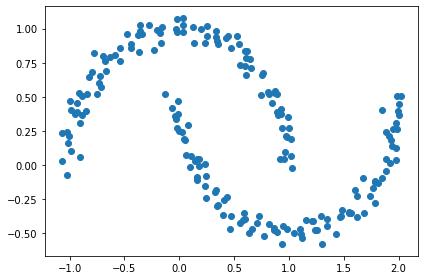

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)

plt.scatter(X[:,0],X[:,1])
plt.tight_layout()
plt.show()

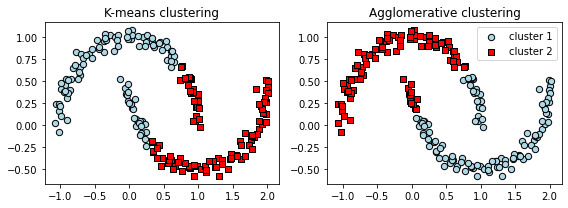

In [12]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
f,(ax1,ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)

y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
            X[y_km==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')

ax1.scatter(X[y_km==1,0],
            X[y_km==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')

###
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
            X[y_ac==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')

ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
plt.show()

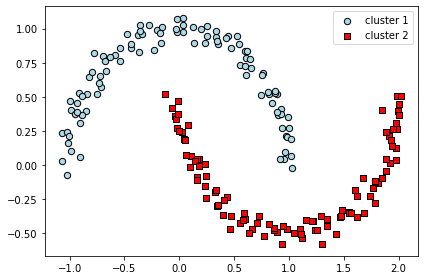

In [13]:
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
import requests
import json
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title":"넷플릭스 AND 오징어게임"},
        "published_at": {
            "from": "2012-01-01",
            "until": "2021-10-05"
            },
            "provider": [],
            "category": ["IT_과학>콘텐츠"],
            "category_incident": [""],
            "byline": "",
            "provider_subject": [""],
            "subject_info": [""],
            "subject_info1": [""],
            "subject_info2": [""],
            "subject_info3": [""],
            "subject_info4": [""],
            "sort": {"date": "asc"},
            "hilight": 200,
            "return_from": 0,
            "return_size": 1000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
js=response.json()

js

{'result': 0,
 'return_object': {'documents': [{'byline': '최보란',
    'category': ['IT_과학>콘텐츠', '문화>방송_연예', '문화>영화'],
    'category_incident': [],
    'dateline': '2019-11-14T11:12:03.000+09:00',
    'enveloped_at': '2019-11-14T11:12:03.000+09:00',
    'hilight': '이정재 측 .."<b>넷플릭스</b> ..\'<b>오징어게임</b>\', 제안 받고 검토중"(공식입장) 배우 이정재가 <b>넷플릭스</b> 오리지널 시리즈 ..\'오징어 게임\' 출연을 검토 중이다. .. ..이정재의 소속사 아티스..\'오징어 게임\'은 인생의 패배자로 살아가고 있는 사람들이 100억원의 상금이 걸린 의문의 서바이벌 게임에 참여하며 벌어지는 이야기를 담은 <b>넷플릭스</b> 오리지널 시리즈다...',
    'news_id': '08100401.20191114111203001',
    'provider': 'YTN',
    'provider_news_id': '201911141111342145',
    'published_at': '2019-11-14T00:00:00.000+09:00',
    'title': '이정재 측 "넷플릭스 \'오징어게임\', 제안 받고 검토중"(공식입장)'},
   {'byline': '이유나',
    'category': ['문화>영화', '문화>방송_연예', 'IT_과학>콘텐츠'],
    'category_incident': [],
    'dateline': '2021-08-27T11:02:02.000+09:00',
    'enveloped_at': '2021-08-27T11:02:02.000+09:00',
    'hilight': "..<b>오징어게임</b>'-'지옥'...하반기 야심작 대방출하는 <b>넷플릭스</b>..글로벌 O

In [28]:
hits = js['return_object']['total_hits']

In [29]:
title_list = []
for hit in range(hits):
    title_list.append(js['return_object']['documents'][hit]['title'])

In [30]:
title_list

['이정재 측 "넷플릭스 \'오징어게임\', 제안 받고 검토중"(공식입장)',
 "[Y초점] 'D.P'-'오징어게임'-'지옥'...하반기 야심작 대방출하는 넷플릭스",
 "[Y리뷰] 넷플릭스 '오징어게임' 첫회부터 빠져든다",
 "[Y이슈] 넷플릭스 '오징어게임', 표절 의혹·시대착오적 표현 '시끌'",
 "'오징어게임' 韓 최고 기록 세웠다…전세계 넷플릭스 2위",
 "'D.P.' '오징어게임' 넷플릭스 잡을까…한국 오는 '디즈니+'",
 '한국드라마 \'오징어게임\' 미국 넷플릭스 인기 1위…"강력 추천"',
 "'오징어게임' 美넷플릭스 1위 찍은날, 이병헌이 올린 사진",
 '이병헌, ‘오징어게임’ 美 넷플릭스 1위한 날 올린 사진',
 "'오징어게임', 美 넷플릭스 1위…한국 드라마 최초",
 '美넷플릭스서 1위 ‘오징어게임’…이병헌이 공개한 굿즈는?',
 '‘오징어게임’ 사상 첫 미국 넷플릭스 1위…K드라마 새 역사 썼다',
 '이정재 주연 한국산 넷플릭스 드라마 ‘오징어게임’ 세계적 돌풍',
 "전세계가 푹 빠졌다…'오징어게임' 美 넷플릭스서 1위",
 '방호정의 컬쳐 쇼크 & 조크 <6> 넷플릭스 오리지널 드라마 ‘오징어게임’',
 '‘오징어게임’ 한국 드라마 최초 美넷플릭스 1위',
 '무한경쟁 사회에 경종… 넷플릭스 ‘오징어게임’ 전세계 인기',
 '‘오징어게임’ 美 넷플릭스 1위한 날 이병헌이 한 행동',
 '\'오징어게임\' 韓 드라마 최초 美 넷플릭스 1위…"\'K-게임\' 통했다"',
 "버킷스튜디오, '오징어게임' 넷플릭스 1위...이정재 소속사 지분 보유 '상한가'",
 "넷플릭스, 국내결제 월간 신기록…''D.P' '오징어게임'까지 연속 호재",
 "200억 오징어게임…넷플릭스가 키운 K드라마 '쩐의 전쟁'",
 '"\'오징어게임\' 이정재 영상 여기서"…해외 팬덤 주목하는 넷플릭스',
 "넷플릭스 韓 오리지널 '오징어게임', 3일 연속 미국 많이 본 콘텐츠 1위",
 "넷플릭스 '오징어게임' 실제 휴대폰 번호 노출…“24시간 문자

In [ ]:
!pip install sent2vec

In [96]:
from sent2vec.vectorizer import Vectorizer
sentences = title_list

vectorizer = Vectorizer()
vectorizer.bert(sentences)
vectors = vectorizer.vectors
vectors

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


array([[-0.12480885, -0.29647273,  0.1141125 , ...,  0.1762996 ,
         0.58781075, -0.05294142],
       [-0.06629077, -0.21981557, -0.08071971, ...,  0.13176769,
         0.66910195,  0.08101489],
       [-0.23963985, -0.30210963,  0.19230756, ...,  0.09949777,
         0.490915  , -0.09567616],
       ...,
       [-0.18757628, -0.3257158 ,  0.14721514, ...,  0.15260562,
         0.6040827 , -0.07273095],
       [-0.20082252, -0.20168167, -0.00346241, ...,  0.11781814,
         0.45879793, -0.09191976],
       [-0.16987614, -0.18905179,  0.155352  , ...,  0.15743993,
         0.47700435, -0.12343775]], dtype=float32)

In [41]:
# Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [44]:
import nltk
nltk.download('punkt')
tagged_data = []

data = title_list

for i, _d in enumerate(data):
    tagged_data.append(TaggedDocument(words=word_tokenize(_d), tags=[str(i)]))

print(tagged_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[TaggedDocument(words=['이정재', '측', '``', '넷플릭스', "'오징어게임", "'", ',', '제안', '받고', '검토중', "''", '(', '공식입장', ')'], tags=['0']), TaggedDocument(words=['[', 'Y초점', ']', "'D.P'-'오징어게임'-'지옥", "'", '...', '하반기', '야심작', '대방출하는', '넷플릭스'], tags=['1']), TaggedDocument(words=['[', 'Y리뷰', ']', '넷플릭스', "'오징어게임", "'", '첫회부터', '빠져든다'], tags=['2']), TaggedDocument(words=['[', 'Y이슈', ']', '넷플릭스', "'오징어게임", "'", ',', '표절', '의혹·시대착오적', '표현', "'시끌", "'"], tags=['3']), TaggedDocument(words=["'오징어게임", "'", '韓', '최고', '기록', '세웠다…전세계', '넷플릭스', '2위'], tags=['4']), TaggedDocument(words=["'D.P", '.', "'", "'오징어게임", "'", '넷플릭스', '잡을까…한국', '오는', "'디즈니+", "'"], tags=['5']), TaggedDocument(words=['한국드라마', "'오징어게임", "'", '미국', '넷플릭스', '인기', '1위…', "''", '강력', '추천', "''"], tags=['6']), TaggedDocument(words=["'오징어게임", "'", '美넷플릭스', '1위', '찍은날', ',', '이병헌이', '올린', '사진'], tags=['7']), TaggedDocument(words=['이병헌', ',',

In [67]:
# doc2vec model train & model save

max_epochs = 200
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [91]:
model.__str__

<bound method Doc2Vec.__str__ of <gensim.models.doc2vec.Doc2Vec object at 0x7f5cf1ef2e50>>

findfont: Font family ['D2Coding'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53945 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49457 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 53945 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 49457 missing from current font.



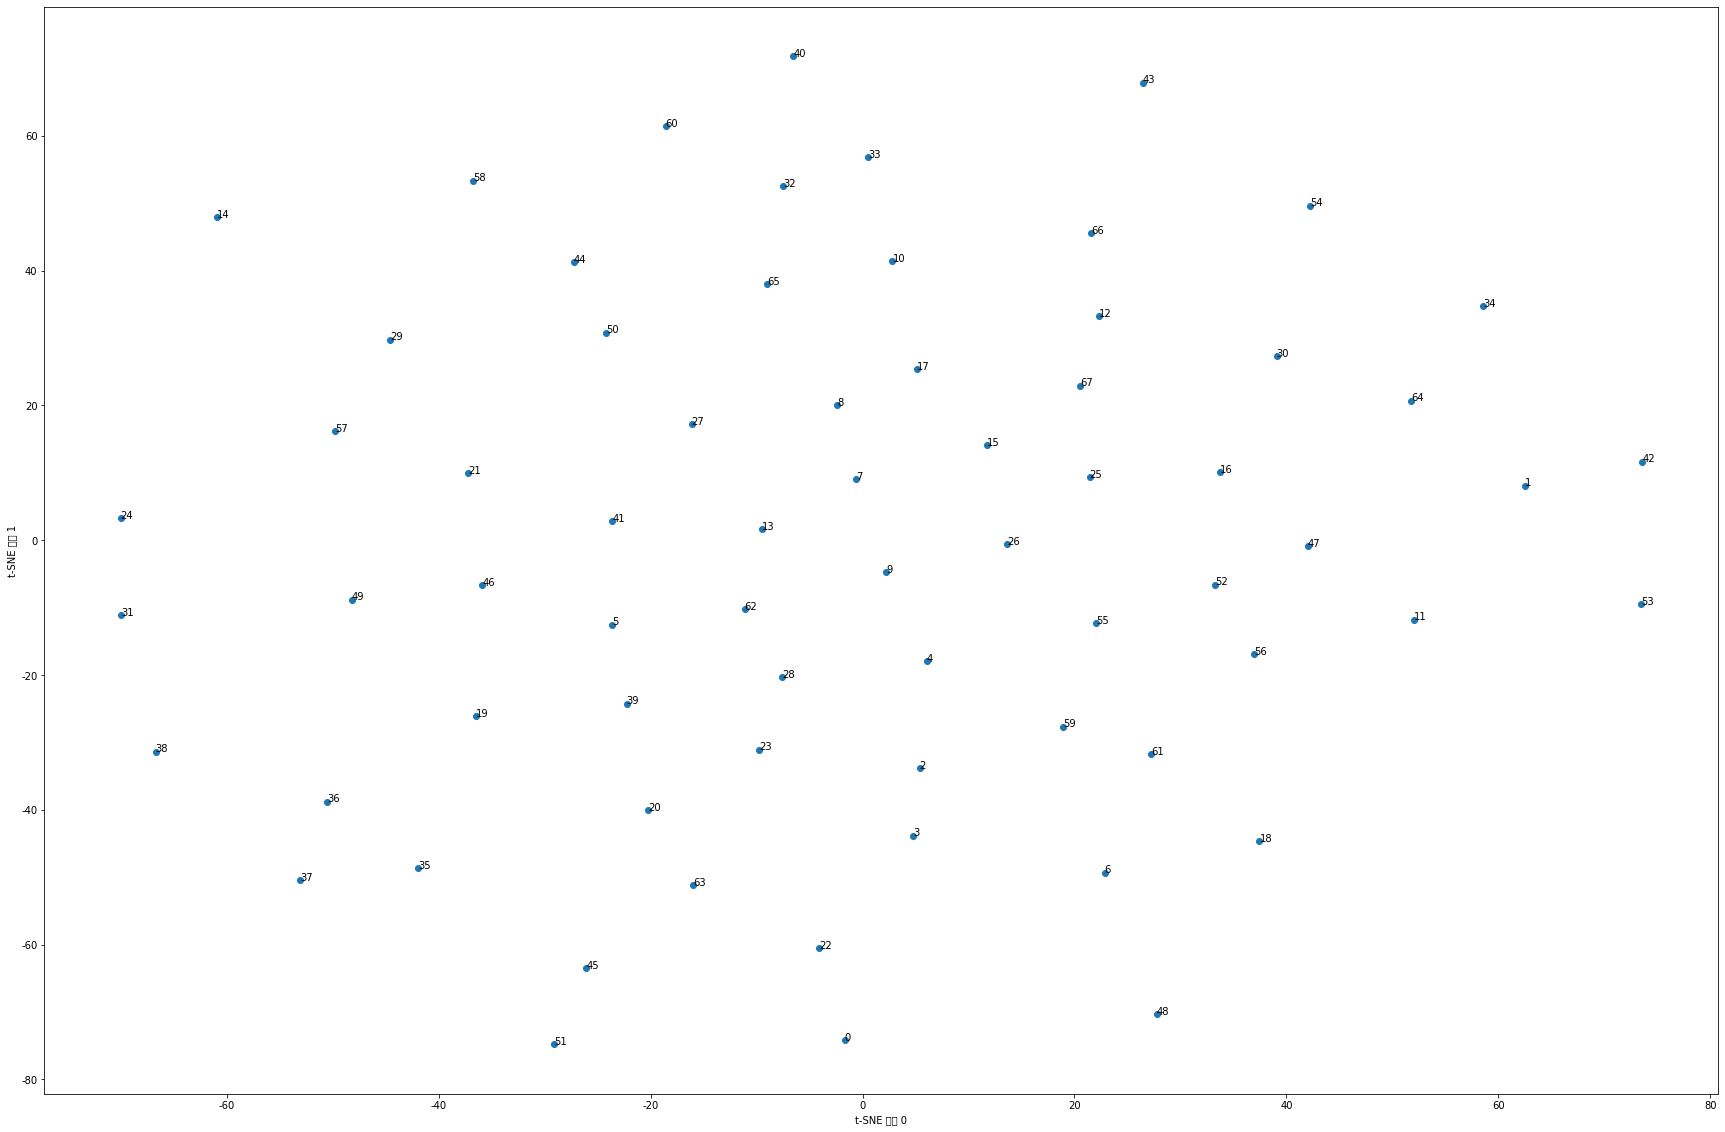

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52395 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48264 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51704 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49457 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48516 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46160 missing from current font.

findfont: Font family ['D2Coding'] not found. Fa

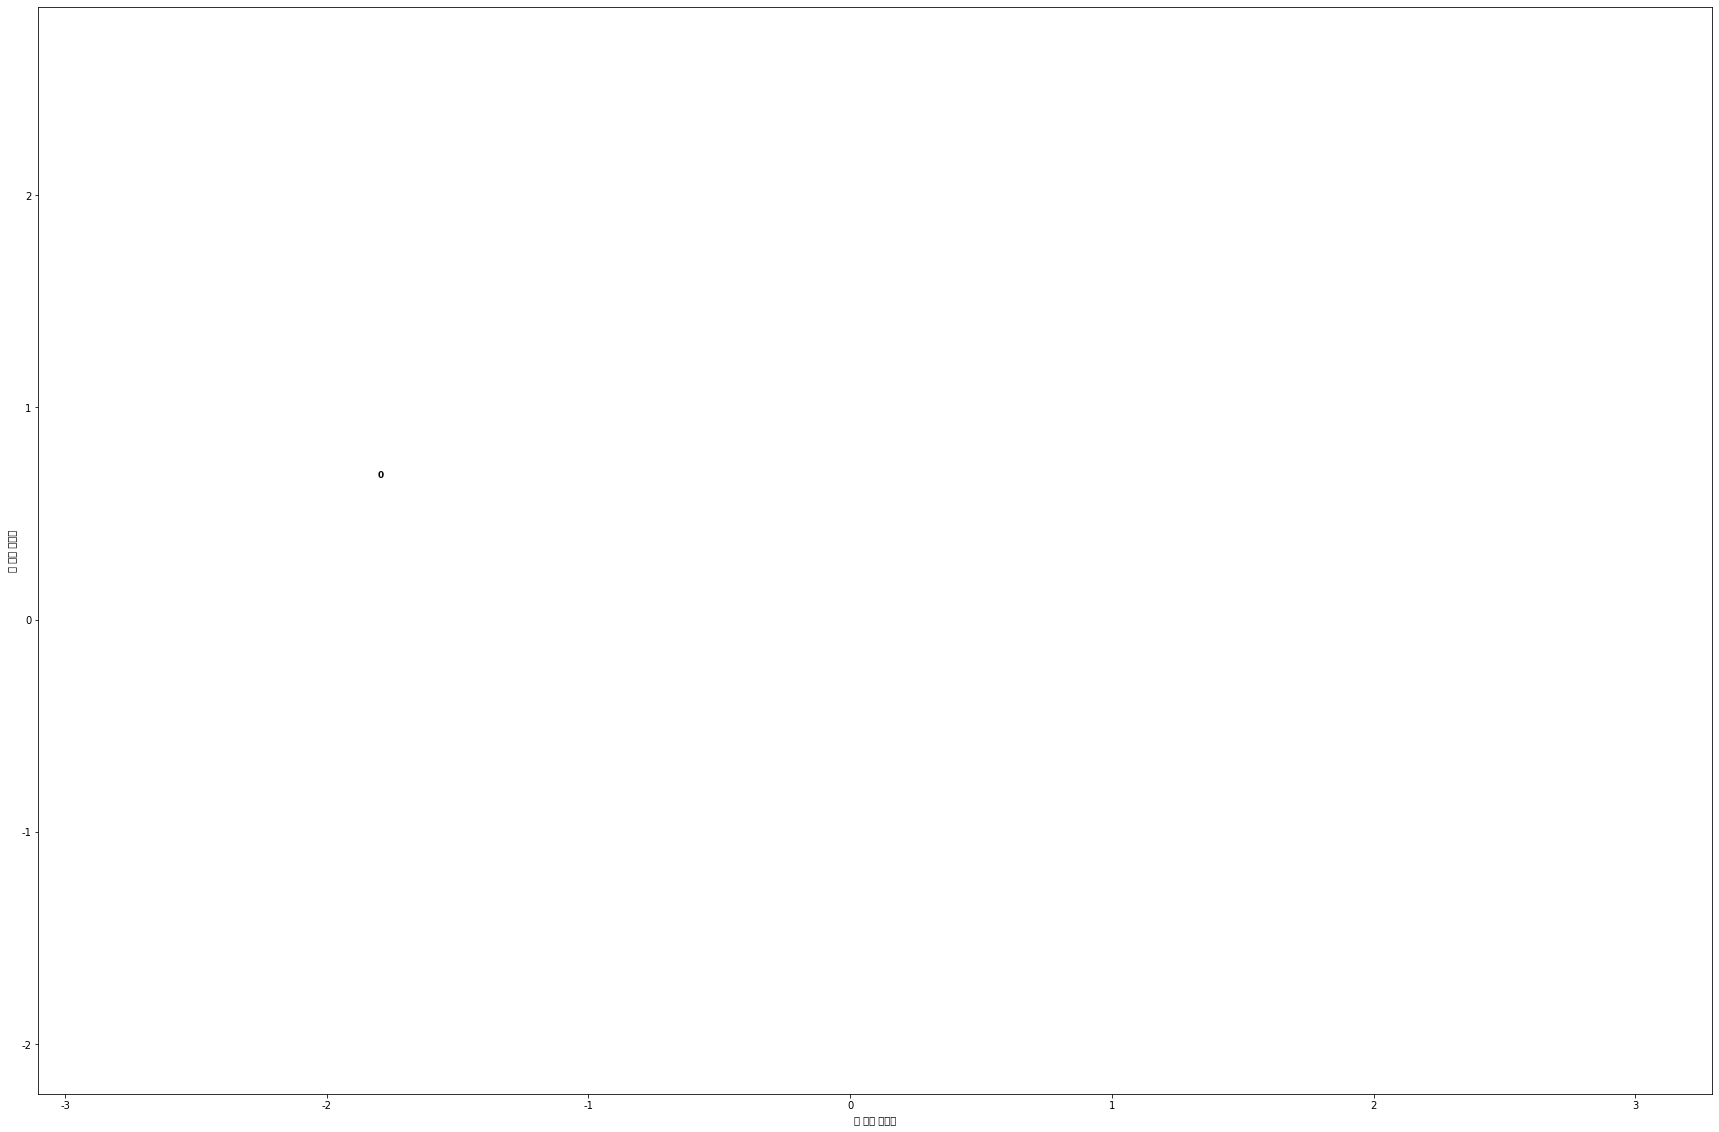

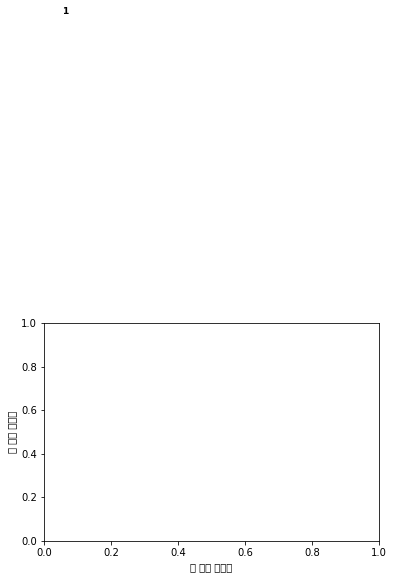

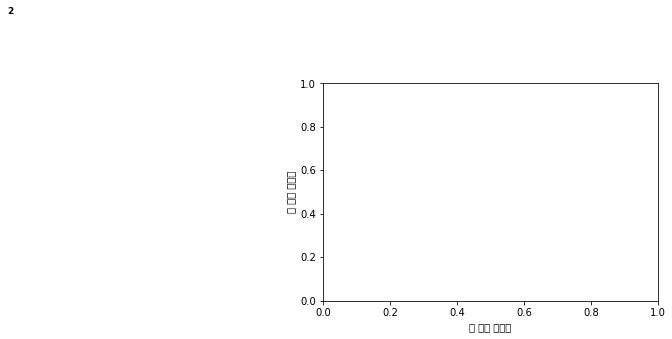

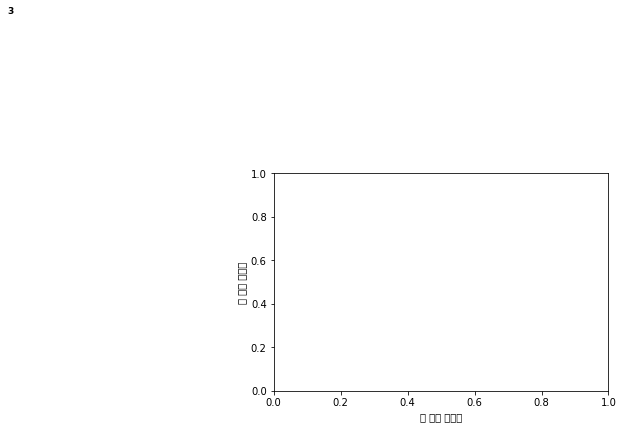

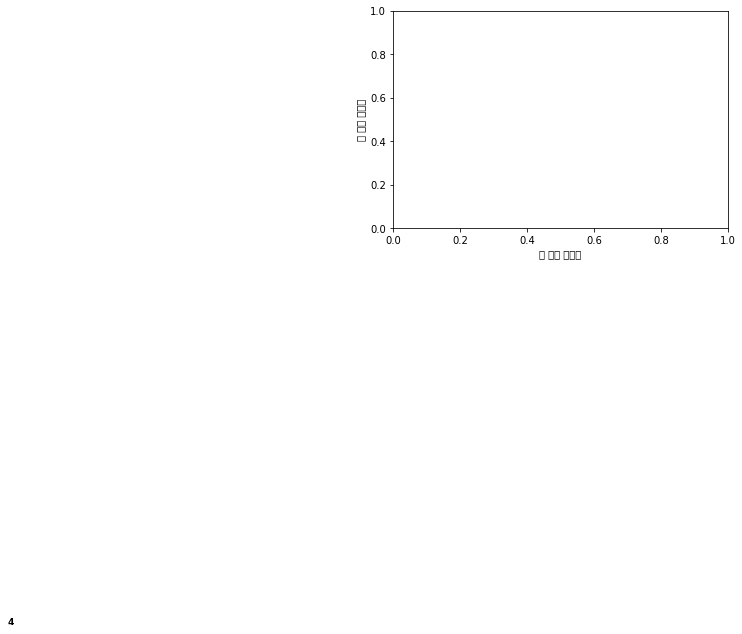

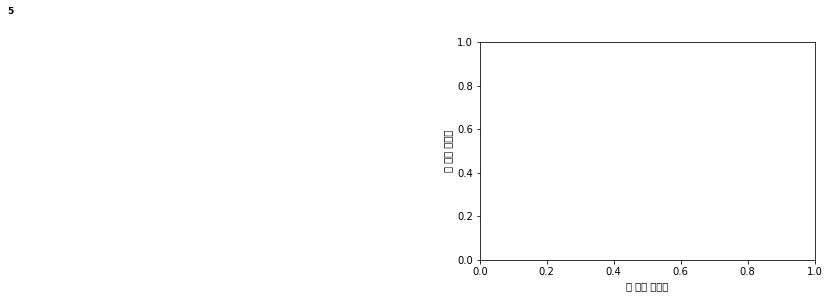

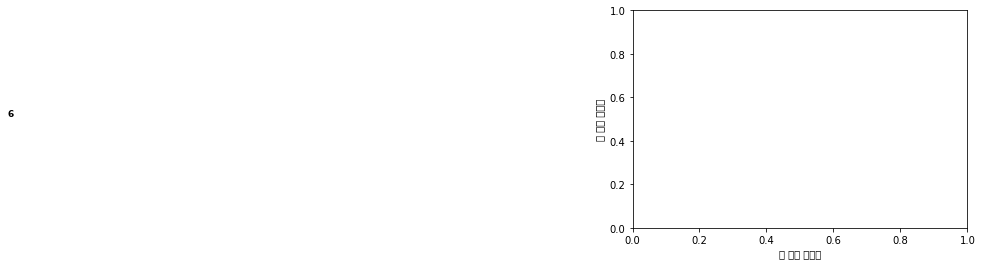

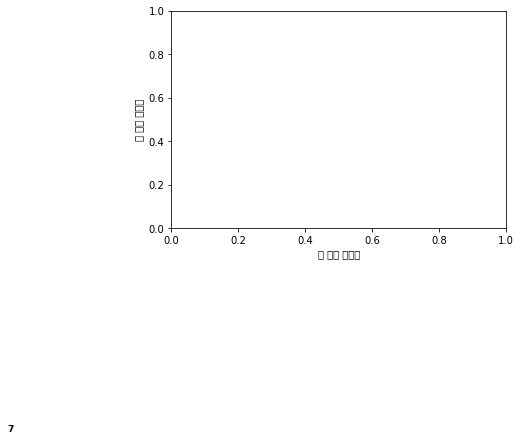

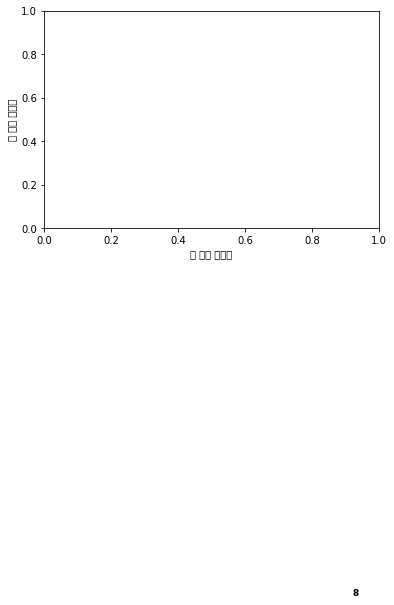

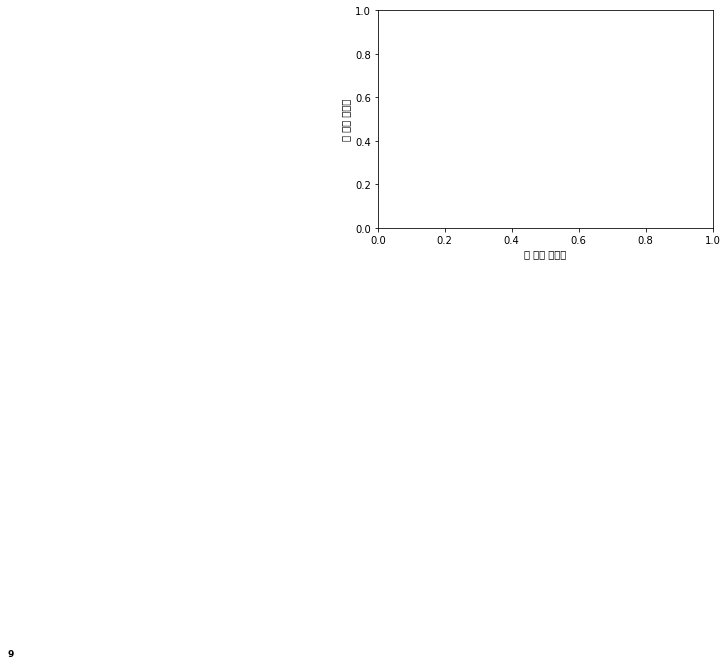

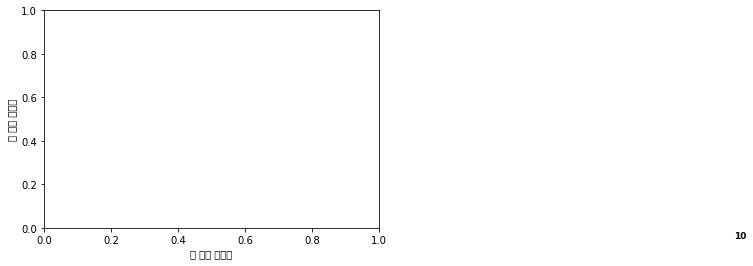

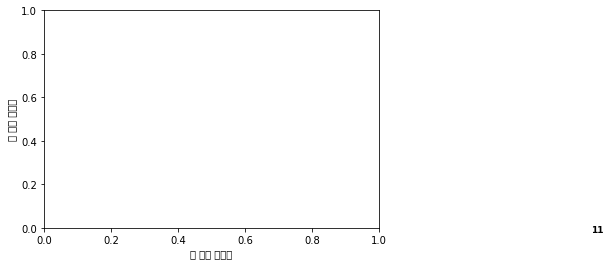

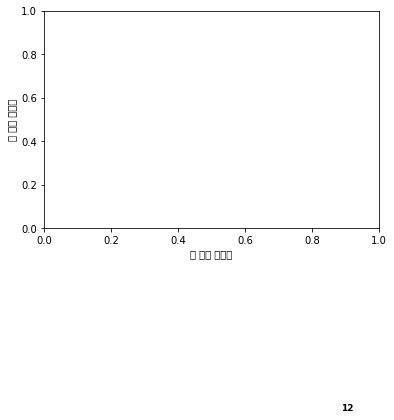

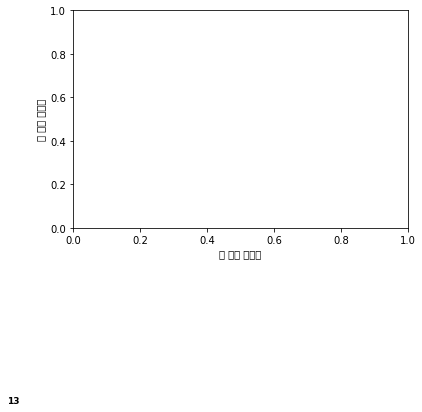

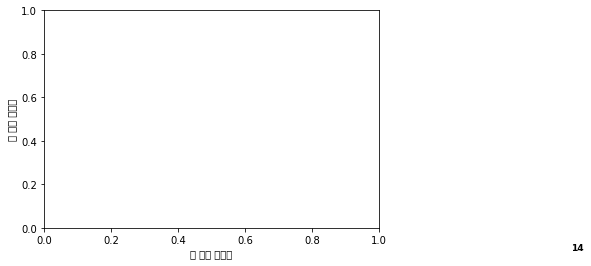

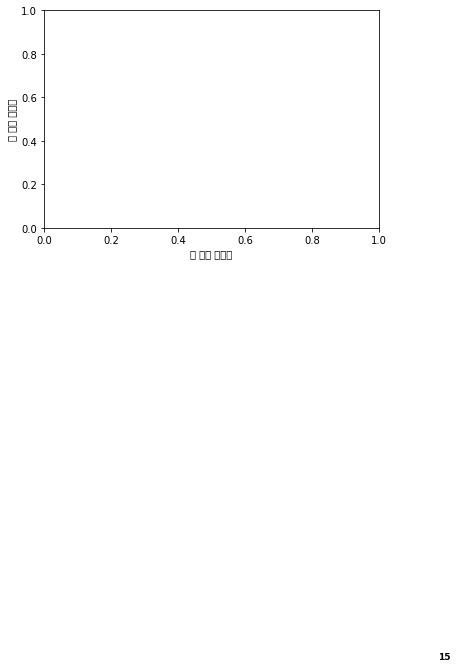

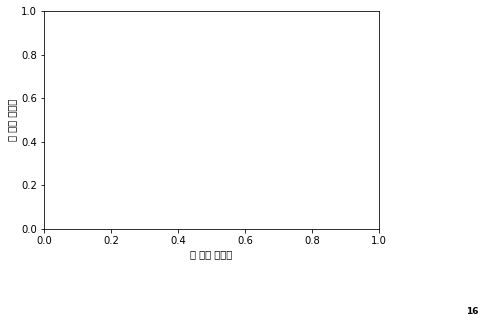

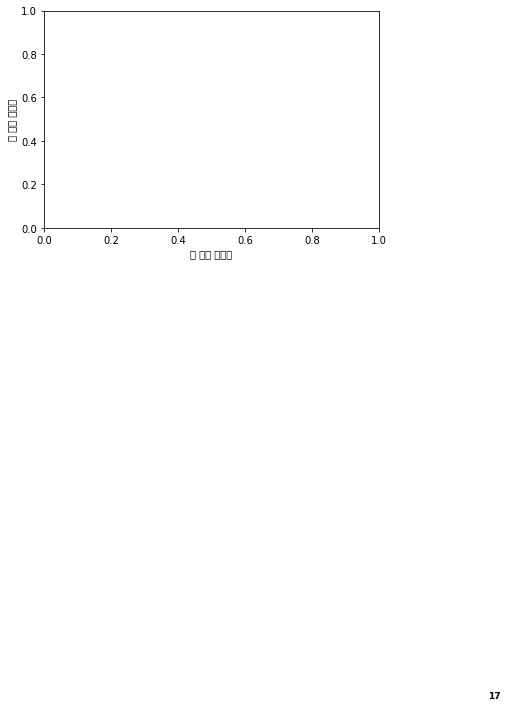

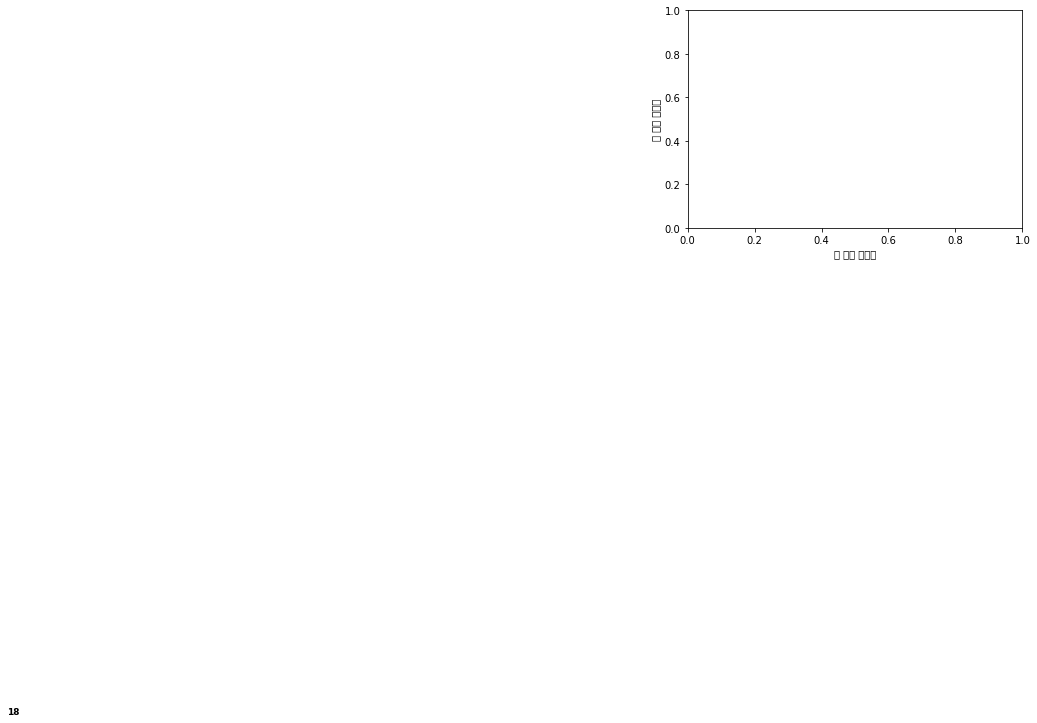

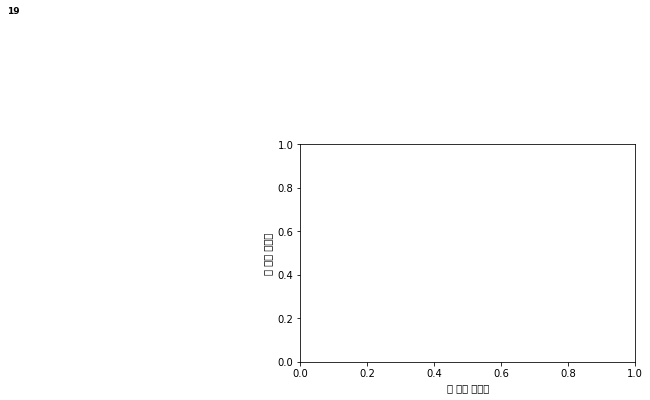

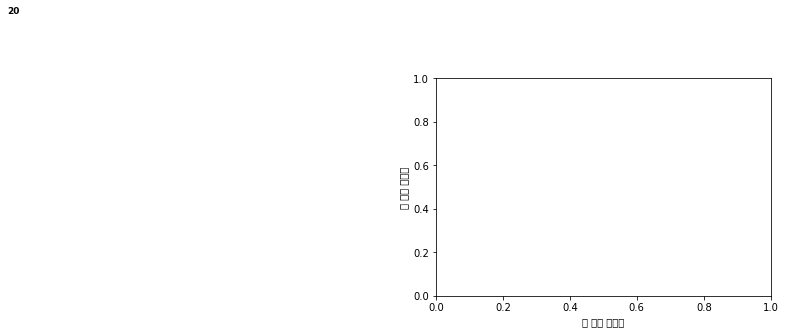

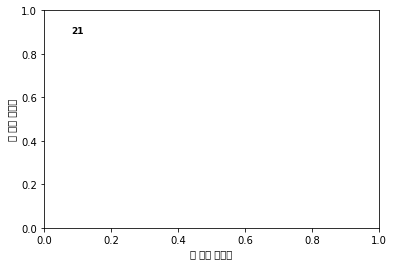

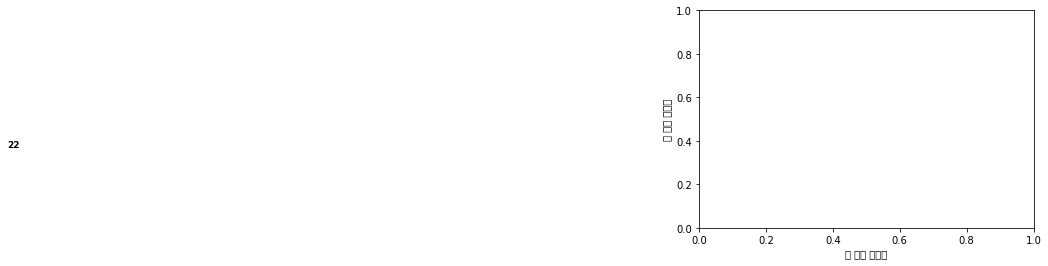

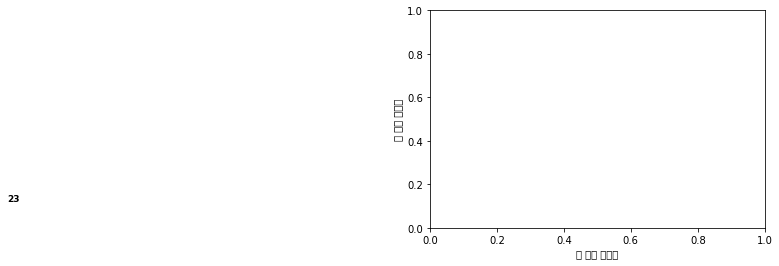

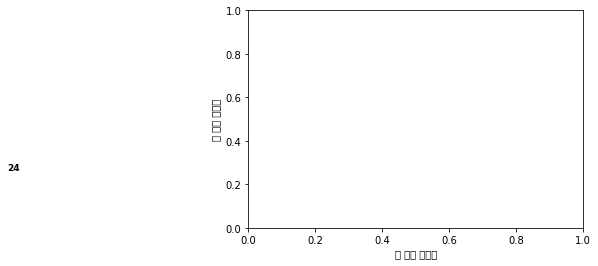

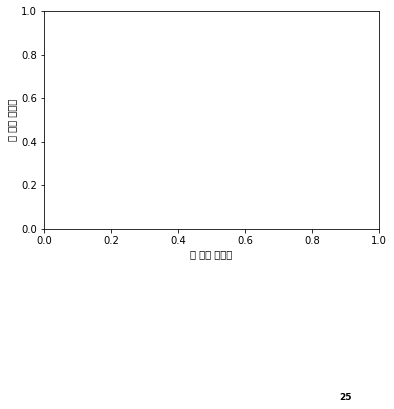

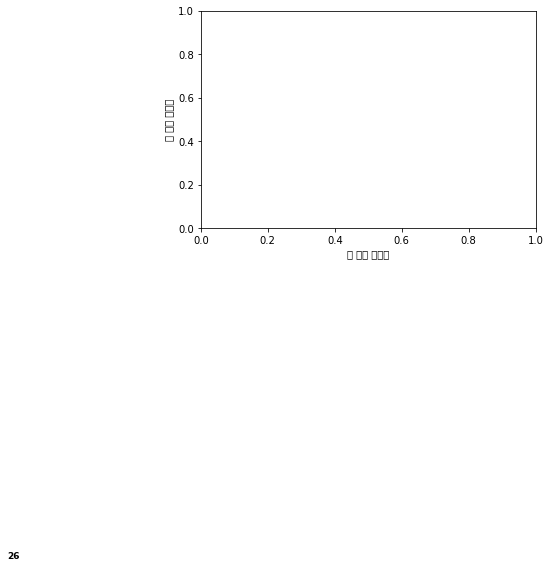

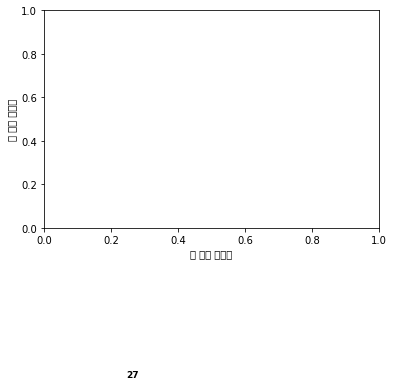

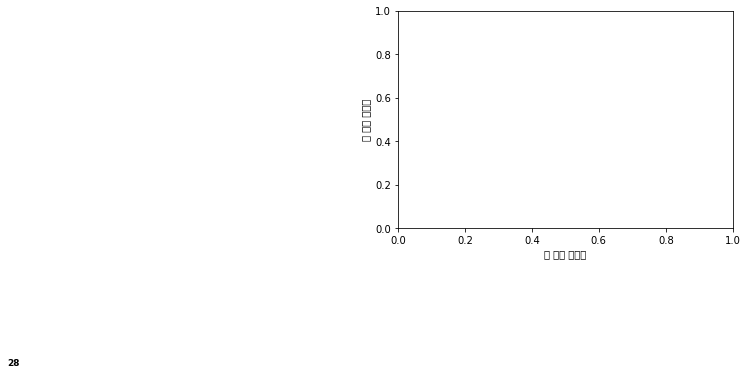

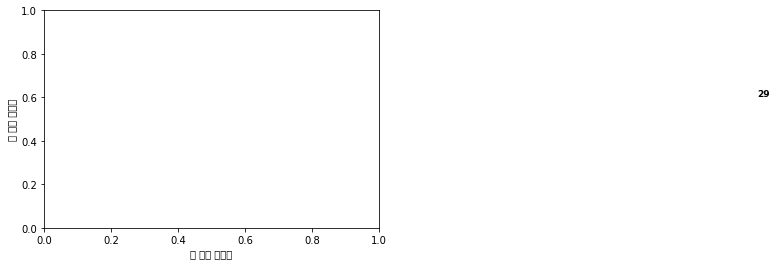

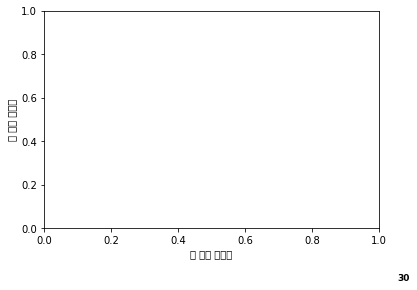

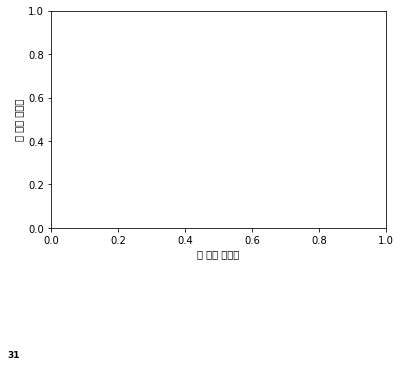

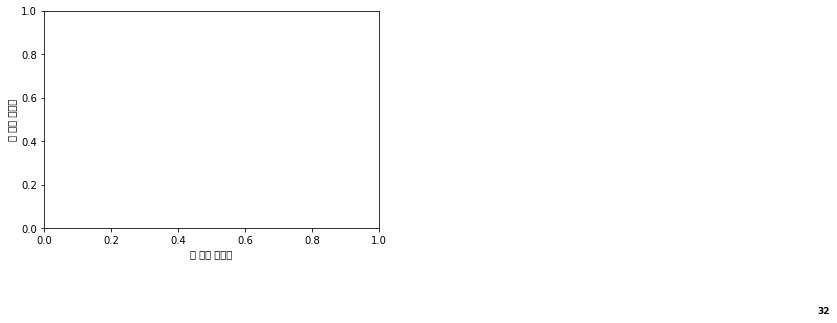

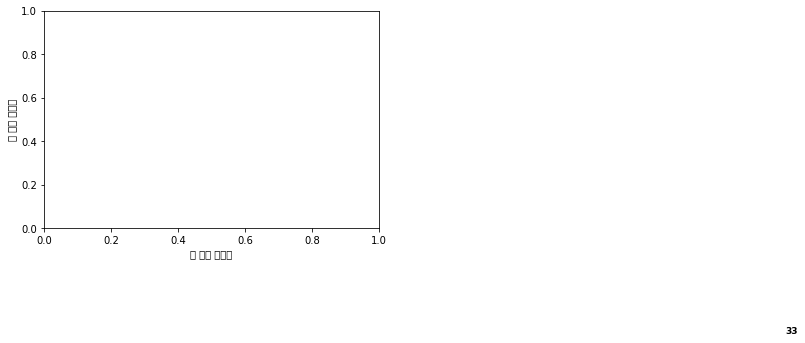

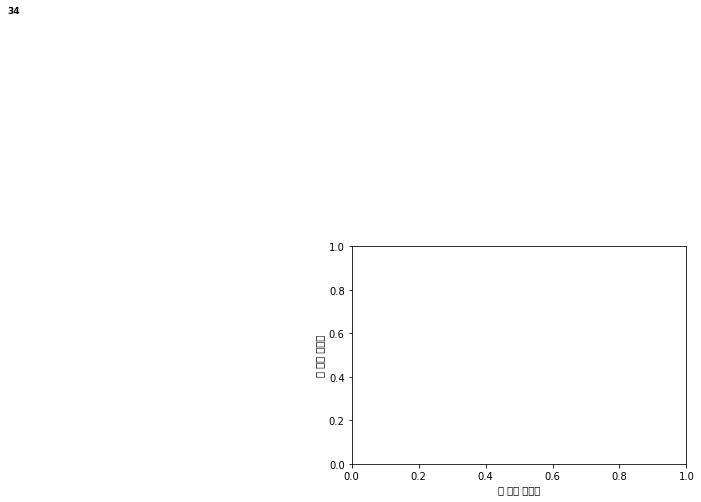

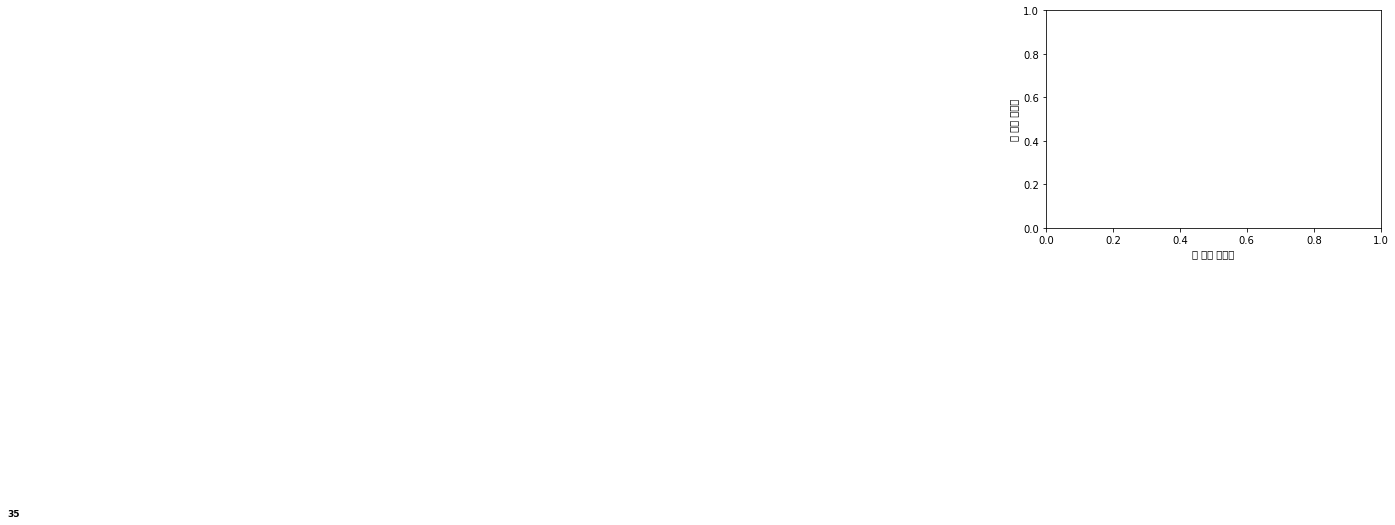

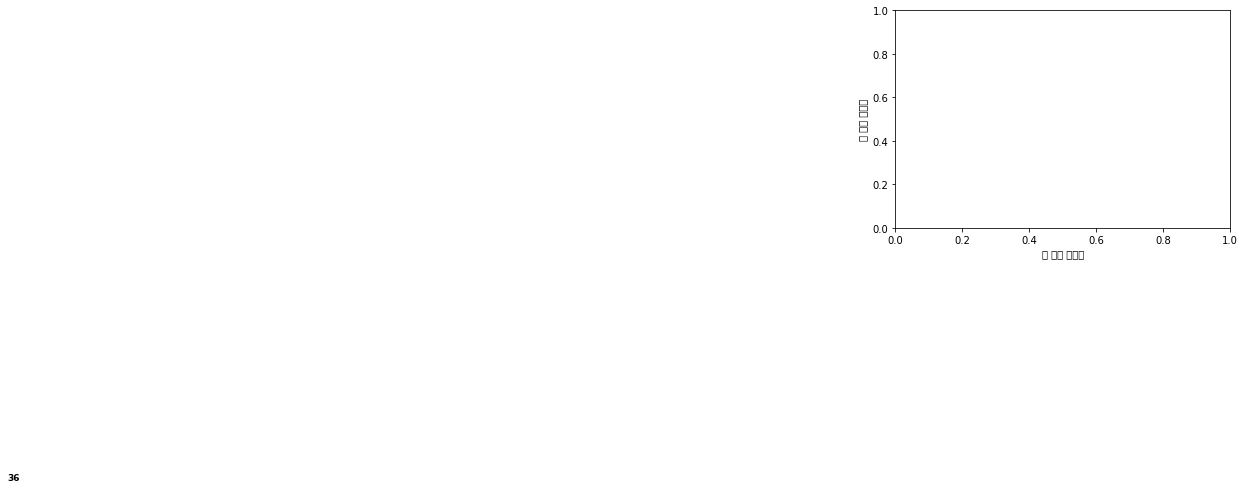

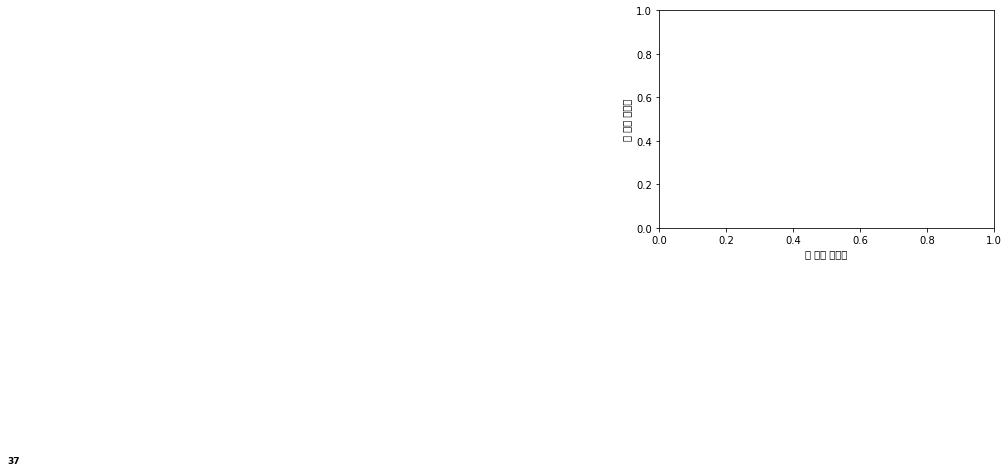

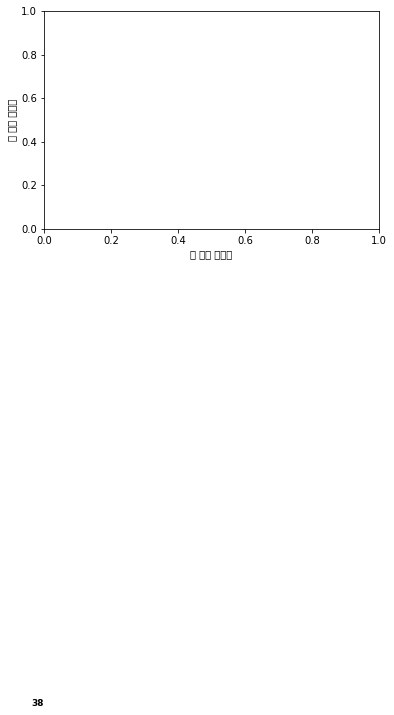

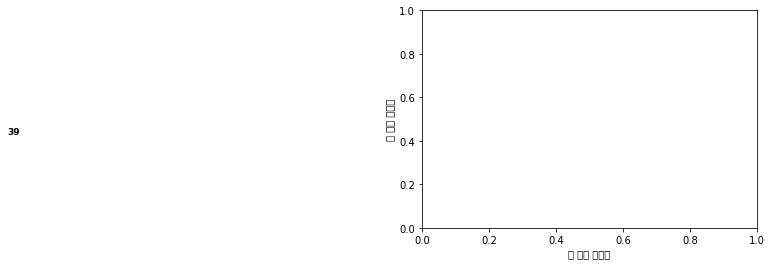

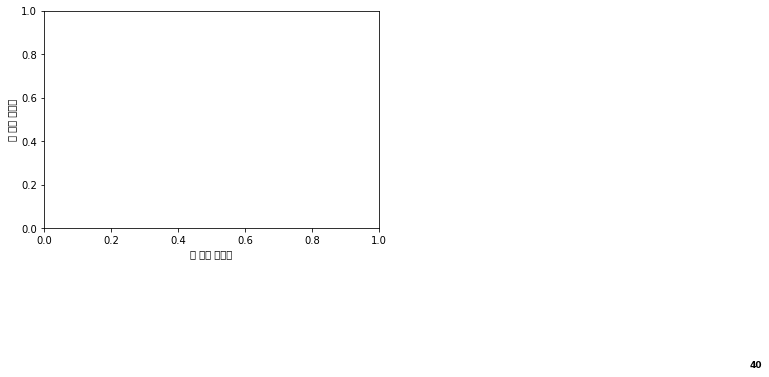

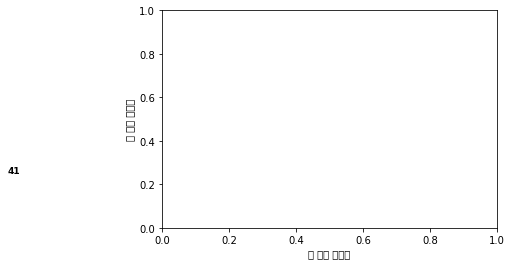

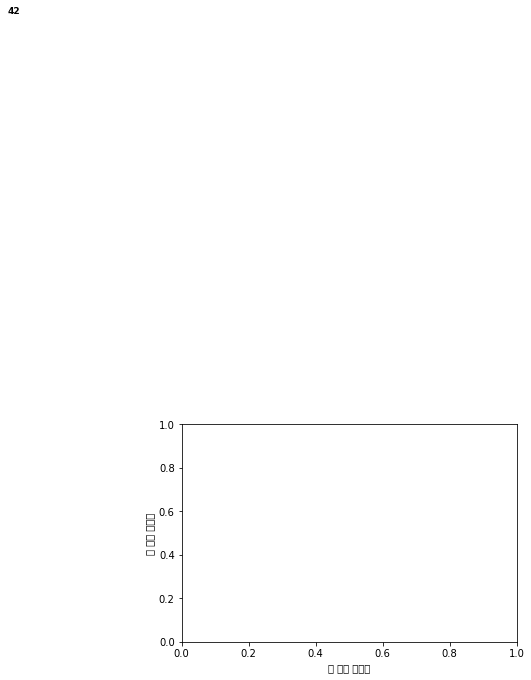

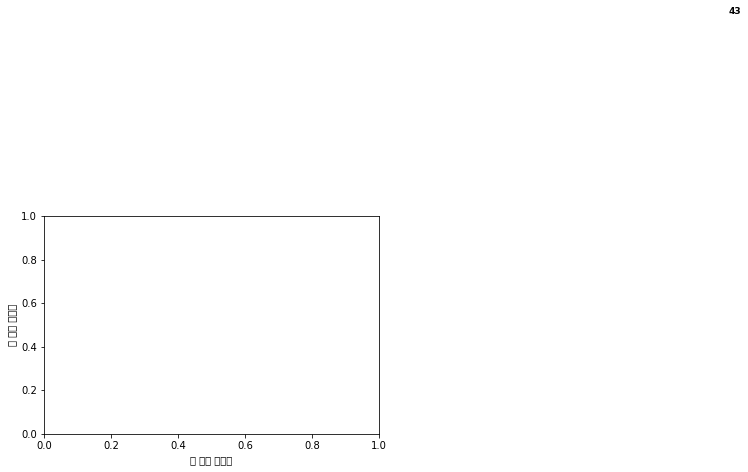

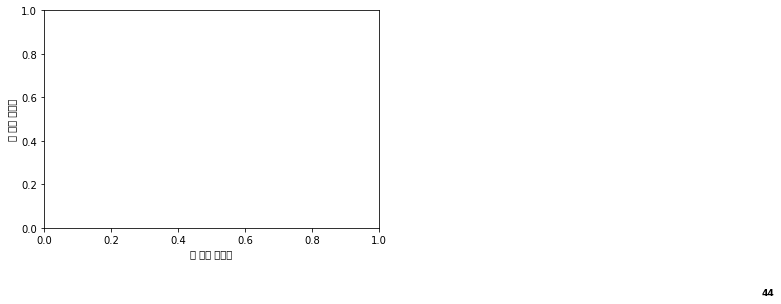

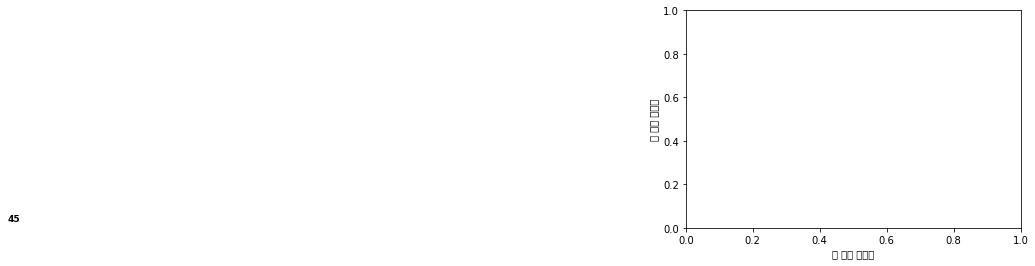

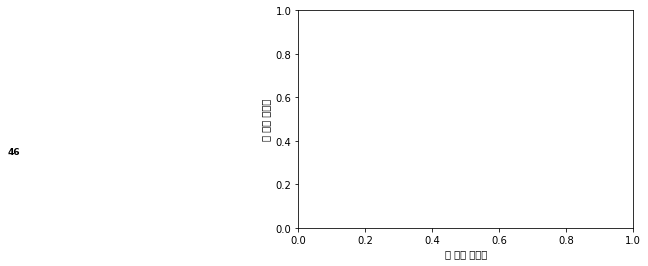

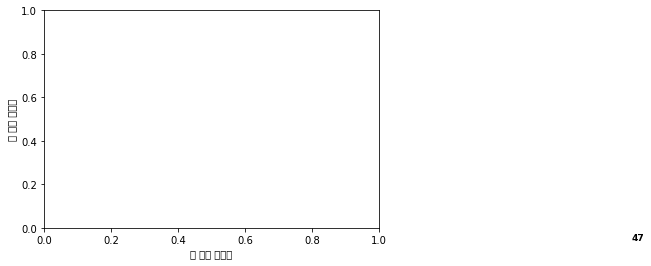

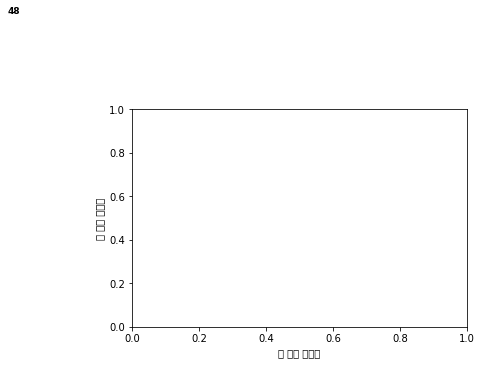

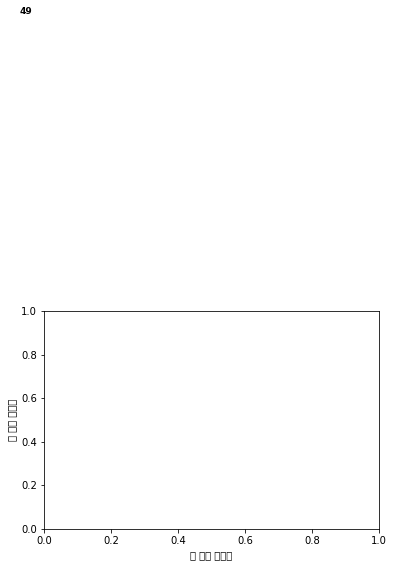

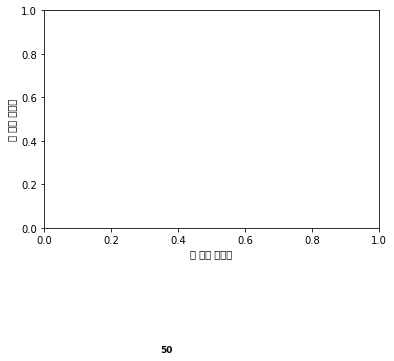

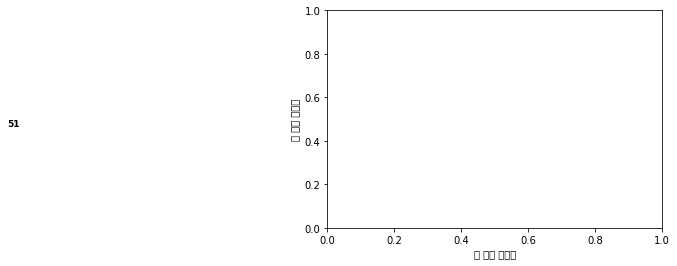

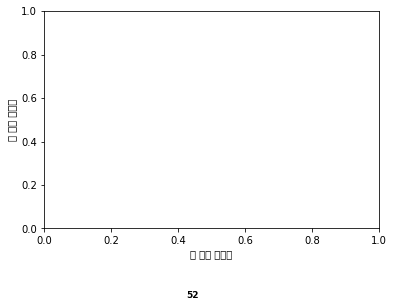

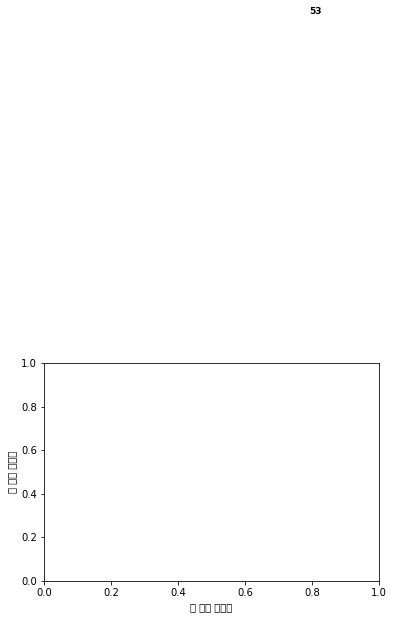

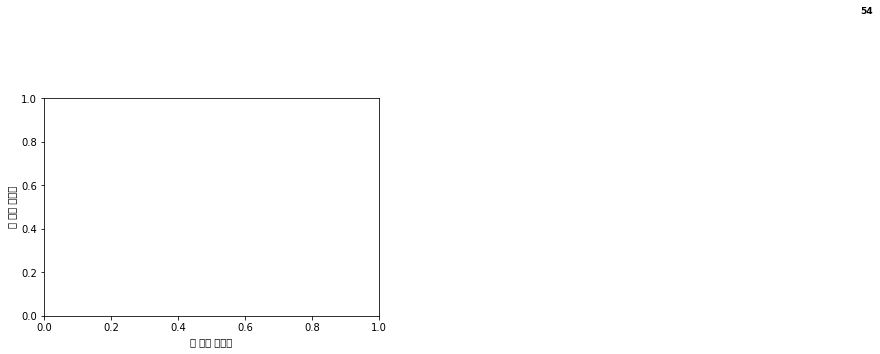

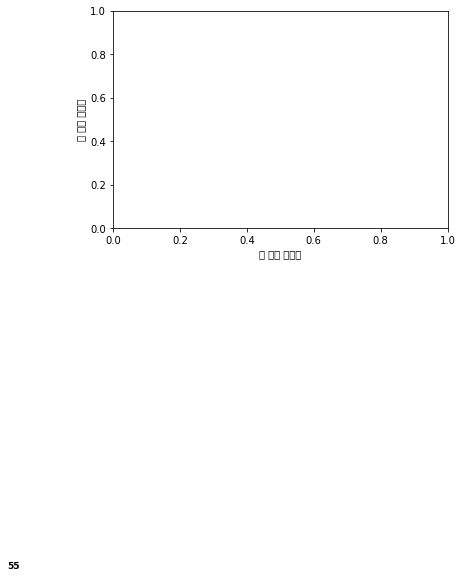

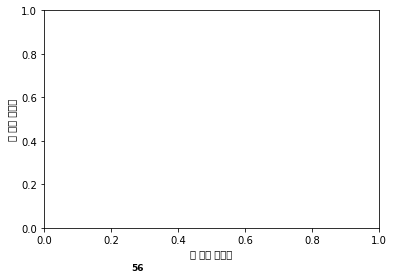

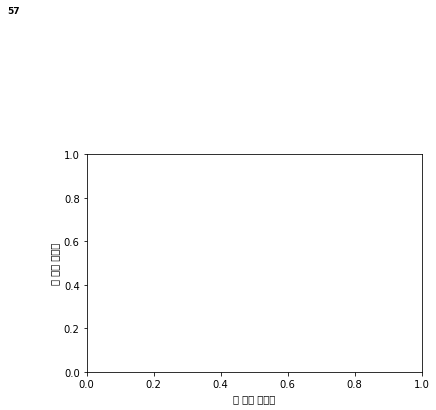

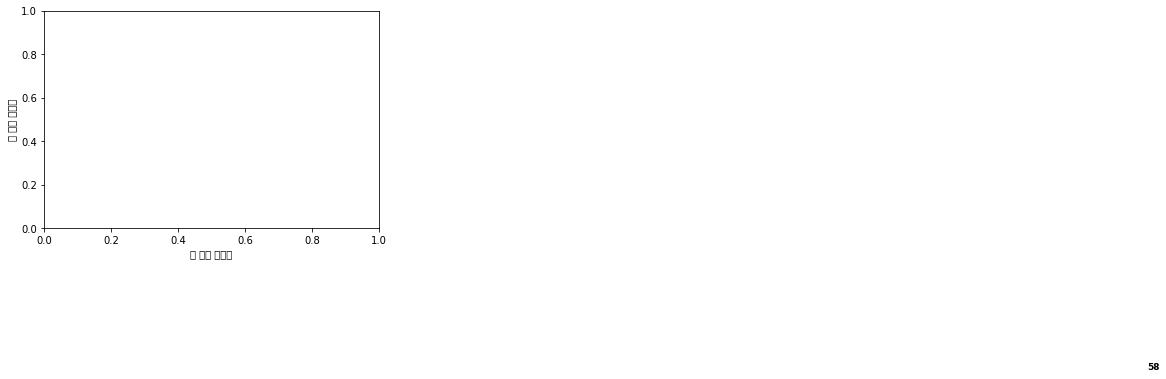

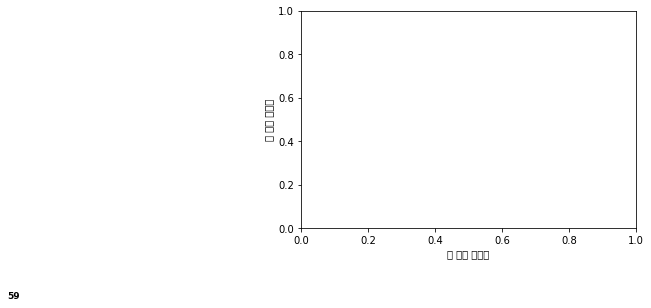

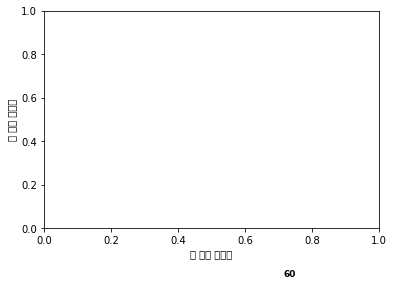

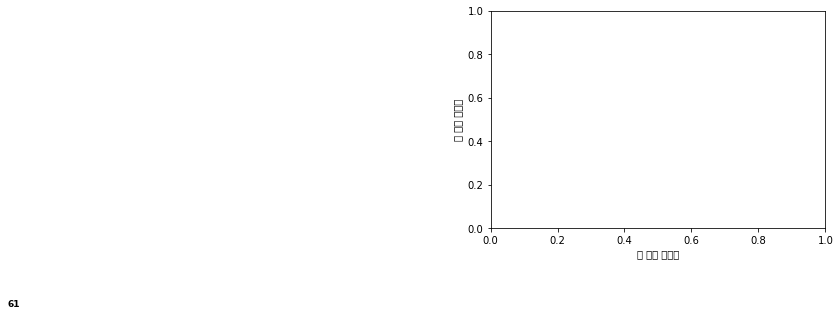

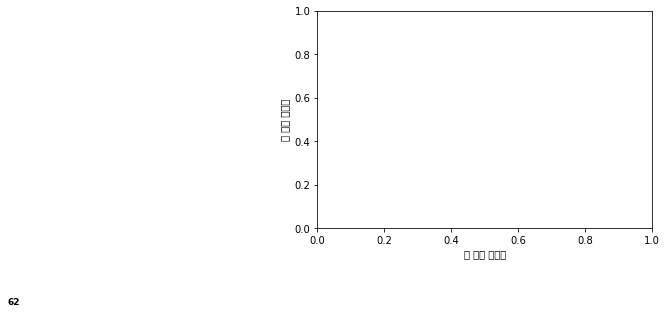

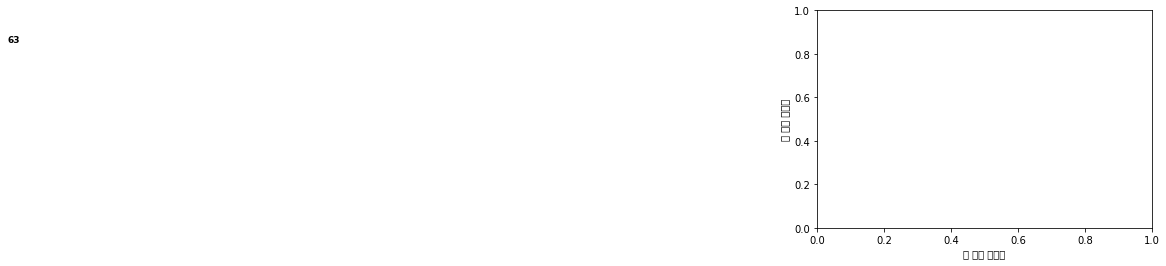

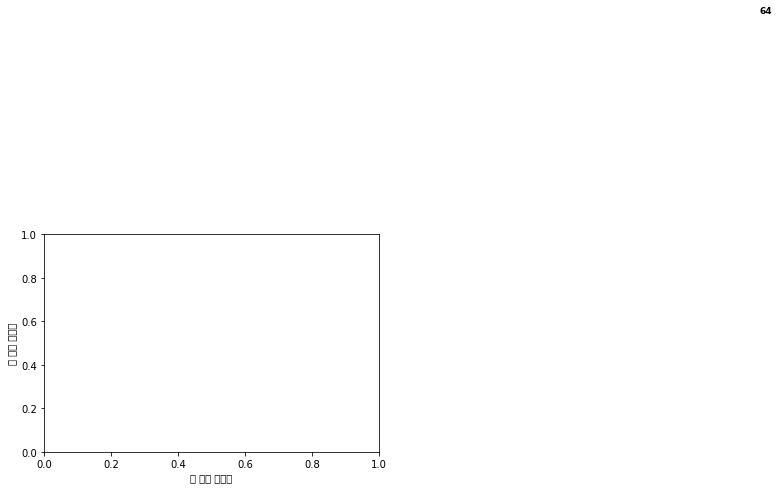

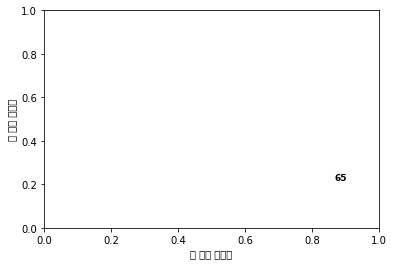

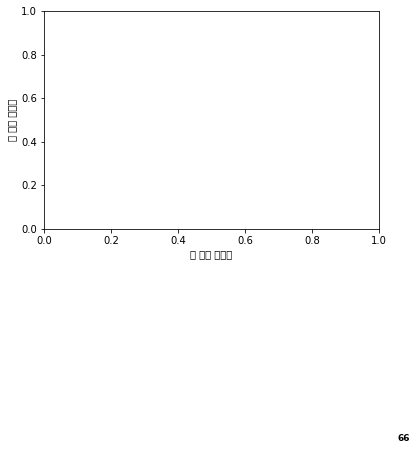

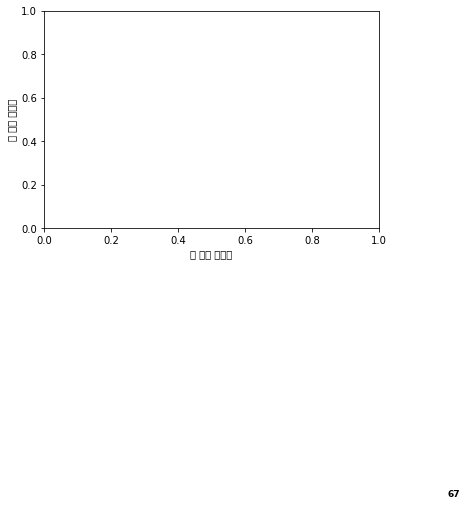

In [93]:
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd 
from gensim.models import KeyedVectors 
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 

plt.rc('font', family='D2Coding') 

def show_tsne(): 
    tsne = TSNE(n_components=2) 
    X = tsne.fit_transform(X_show) 
    
    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
    fig = plt.figure() 
    fig.set_size_inches(30, 20) 
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(df['x'], df['y']) 

    for word, pos in df.iterrows(): 
        ax.annotate(word, pos, fontsize=10) 

    plt.xlabel("t-SNE 특성 0") 
    plt.ylabel("t-SNE 특성 1") 
    plt.show() 

def show_pca(): 
    # PCA 모델을 생성합니다 
    pca = PCA(n_components=2) 
    pca.fit(X_show) 
    # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
    x_pca = pca.transform(X_show) 
    plt.figure(figsize=(30, 20)) 
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max())
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
    for i in range(len(X_show)): 
        plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), fontdict={'weight': 'bold', 'size': 9}) 
        plt.xlabel("첫 번째 주성분") 
        plt.ylabel("두 번째 주성분") 
        plt.show() 
model_name = 'D:/Data/embedding/data/word-embeddings/word2vec/word2vec' 
#model = KeyedVectors.load_word2vec_format(model_name)
model = model

vocab = [i for i in range(68)]
X = model[vocab] 

# sz개의 단어에 대해서만 시각화 
sz = 800 
X_show = X[:sz,:] 
vocab_show = vocab[:sz] 

show_tsne() 
show_pca()



In [75]:
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

words = None
samples = 10

if words == None:
    if sample > 0:
        words = np.random.choice(list(model.vocab.keys()), sample)
    else:
        words = [ word for word in model.vocab ]
    
word_vectors = np.array([model[w] for w in words])
    
#three_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:3]
# For 2D, change the three_dim variable into something like two_dim like the following:
two_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:2]
print(two_dim)


# def display_pca_scatterplot_3D(model, user_input=None, words=None, label=None, color_map=None, topn=5, sample=10):

#     if words == None:
#         if sample > 0:
#             words = np.random.choice(list(model.vocab.keys()), sample)
#         else:
#             words = [ word for word in model.vocab ]
    
#     word_vectors = np.array([model[w] for w in words])
    
#     #three_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:3]
#     # For 2D, change the three_dim variable into something like two_dim like the following:
#     two_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:2]
#     print(two_dim)

#     data = []
#     count = 0
    
#     # for i in range (len(user_input)):

#     #             trace = go.Scatter3d(
#     #                 x = three_dim[count:count+topn,0], 
#     #                 y = three_dim[count:count+topn,1],  
#     #                 z = three_dim[count:count+topn,2],
#     #                 text = words[count:count+topn],
#     #                 name = user_input[i],
#     #                 textposition = "top center",
#     #                 textfont_size = 20,
#     #                 mode = 'markers+text',
#     #                 marker = {
#     #                     'size': 10,
#     #                     'opacity': 0.8,
#     #                     'color': 2
#     #                 }
       
#     #             )
                
#     #             # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
#     #             # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
#     #             data.append(trace)
#     #             count = count+topn

#     # trace_input = go.Scatter3d(
#     #                 x = three_dim[count:,0], 
#     #                 y = three_dim[count:,1],  
#     #                 z = three_dim[count:,2],
#     #                 text = words[count:],
#     #                 name = 'input words',
#     #                 textposition = "top center",
#     #                 textfont_size = 20,
#     #                 mode = 'markers+text',
#     #                 marker = {
#     #                     'size': 10,
#     #                     'opacity': 1,
#     #                     'color': 'black'
#     #                 }
#     #                 )
    
#     for i in range (len(user_input)):

#                 trace = go.Scatter(
#                     x = three_dim[count:count+topn,0], 
#                     y = three_dim[count:count+topn,1],  
#                     text = words[count:count+topn],
#                     name = user_input[i],
#                     textposition = "top center",
#                     textfont_size = 20,
#                     mode = 'markers+text',
#                     marker = {
#                         'size': 10,
#                         'opacity': 0.8,
#                         'color': 2
#                     }
       
#                 )
                
#                 # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
#                 # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
#                 data.append(trace)
#                 count = count+topn

#     trace_input = go.Scatter(
#                     x = three_dim[count:,0], 
#                     y = three_dim[count:,1],  
#                     text = words[count:],
#                     name = 'input words',
#                     textposition = "top center",
#                     textfont_size = 20,
#                     mode = 'markers+text',
#                     marker = {
#                         'size': 10,
#                         'opacity': 1,
#                         'color': 'black'
#                     }
#                     )

#     # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
#     # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
#     data.append(trace_input)
    
# # Configure the layout

#     layout = go.Layout(
#         margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
#         showlegend=True,
#         legend=dict(
#         x=1,
#         y=0.5,
#         font=dict(
#             family="Courier New",
#             size=25,
#             color="black"
#         )),
#         font = dict(
#             family = " Courier New ",
#             size = 15),
#         autosize = False,
#         width = 1000,
#         height = 1000
#         )


#     plot_figure = go.Figure(data = data, layout = layout)
#     plot_figure.show()
    
# display_pca_scatterplot_3D(model, 68, similar_word, labels, color_map)

AttributeError: ignored

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67']
[[ 0.13899787 -0.15439114  0.39618915 ... -1.9100037   0.9287514
  -0.30164817]
 [-0.38309333  0.14345054  0.62367916 ... -1.3044844   0.06964211
   0.62457484]
 [-0.55155545 -0.61992013  0.2244869  ... -1.4220166  -0.01678377
   0.63197726]
 ...
 [-0.59492165 -1.4519413   0.81892407 ... -1.462759    0.24453437
   0.39765278]
 [ 0.55306196 -0.5892649   0.5335044  ... -1.4617118   0.44846156
   0.3310015 ]
 [ 0.06680614 -0.634172    0.35845813 ... -0.8142915   0.8351329
   0.54675525]]


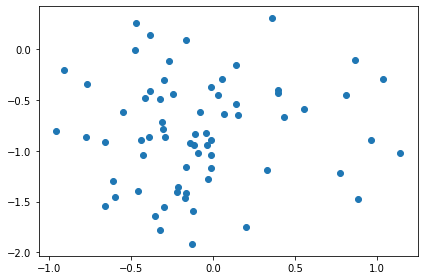

In [68]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)


import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.tight_layout()
plt.show()

In [66]:
#title_list
emb_dict=dict()
for index, key in enumerate(title_list):
    emb_dict[f'{X[index]}'] = key

emb_dict

{'[ 0.566783  -3.5118408]': '오징어게임 인기에…넷플릭스 주가 사상 최고',
 '[ 0.59770507 -4.235722  ]': '한국 드라마 ‘오징어게임’ 넷플릭스 83개국서 1위 신기록 돌풍',
 '[ 0.6745413 -5.0722632]': '‘오징어게임’ 덕 보고 망사용료는 뒷짐?… SK브로, 넷플릭스 소송',
 '[ 0.7356523 -3.8679836]': '한국드라마 \'오징어게임\' 미국 넷플릭스 인기 1위…"강력 추천"',
 '[ 1.1736486 -5.0606704]': "'D.P.' '오징어게임' 넷플릭스 잡을까…한국 오는 '디즈니+'",
 '[ 1.2391357 -5.1184916]': '유통가, 넷플릭스 드라마 ‘오징어게임’ 신드롬…달고나·녹색 체육복 등 불티',
 '[ 1.3407257 -4.9376087]': "버킷스튜디오, '오징어게임' 넷플릭스 1위...이정재 소속사 지분 보유 '상한가'",
 '[ 1.364574  -4.6016874]': "韓 오리지널 '오징어게임' 넷플릭스 세계 1위 쾌거",
 '[ 1.4281489 -4.983539 ]': '이정재 주연 한국산 넷플릭스 드라마 ‘오징어게임’ 세계적 돌풍',
 '[ 1.6401995 -4.01152  ]': '‘오징어게임’ 이번엔 실계좌 유출? 넷플릭스 “사전 협조 받아”',
 '[ 1.7496697 -4.811522 ]': '‘오징어게임’ 계좌번호도 유출?…넷플릭스 “사전 협조받았다”',
 '[ 1.7749331 -5.517974 ]': '방호정의 컬쳐 쇼크 & 조크 <6> 넷플릭스 오리지널 드라마 ‘오징어게임’',
 '[ 1.816695  -5.1694126]': '오징어게임, 6일 美지미팰런쇼 출격…넷플릭스 “출연진은 비밀”',
 '[ 1.8742802 -5.204015 ]': "'오징어게임' 韓 최고 기록 세웠다…전세계 넷플릭스 2위",
 '[ 1.8904124 -4.9495654]': "'오징어게임' 흥행질주, 넷플릭스 역대1위 '브리저튼' 

In [57]:
len(X)

68

In [ ]:
# load doc2vec model
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")

In [1]:
!nvidia-smi

Mon Oct  4 15:09:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install pororo

In [25]:
from pororo import Pororo
zsl = Pororo(task="zero-topic", lang="ko")
zsl('''라리가 사무국, 메시 아닌 바르사 지지..."바이 아웃 유효" [공식발표]''', [""])


{'야구': 82.48, '축구': 79.87, '호날두': 1.09}

In [26]:
se = Pororo(task="sentence_embedding", lang="ko")
se("나는 동물을 좋아하는 사람이야").

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


array([ 8.36153105e-02,  1.75129980e-01,  2.39439338e-01,  6.48625791e-02,
        1.29028752e-01,  1.15776904e-01, -3.06697816e-01, -3.03825885e-01,
        3.03288877e-01,  2.02275082e-01,  2.00609490e-01,  3.36566031e-01,
       -1.59421548e-01, -2.00947538e-01, -1.22919843e-01, -1.04489505e-01,
        3.14842835e-02, -1.15544498e-01,  1.01887822e-01, -2.97220349e-01,
       -1.03190644e-02,  2.59033144e-01,  1.09085880e-01,  5.20056307e-01,
        1.23004302e-01,  4.14226614e-02,  2.67076761e-01,  5.25360666e-02,
       -1.03454337e-01, -8.86485204e-02,  5.88024296e-02,  1.06812194e-01,
       -1.39066368e-01,  2.06366360e-01,  8.08321685e-02, -2.74110496e-01,
        2.63460815e-01,  1.85789973e-01, -1.43697962e-01, -4.47133183e-01,
       -2.21437111e-01,  8.26151669e-02,  6.91769481e-01,  4.04979251e-02,
        1.61823630e-01, -5.48708215e-02, -1.24259450e-01, -9.82460603e-02,
        1.30378127e-01,  1.80288143e-02,  3.10544558e-02,  1.61626842e-03,
       -2.58295834e-01,  

In [31]:
"'오징어게임' 韓 최고 기록 세웠다…전세계 넷플릭스 2위"

se = Pororo(task="sentence_embedding", lang="ko")


query = "'오징어게임' 韓 최고 기록 세웠다…전세계 넷플릭스 2위"
cands = title_list
se.find_similar_sentences(query, cands)


class MyPororo(Pororo):
    super()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


{'query': "'오징어게임' 韓 최고 기록 세웠다…전세계 넷플릭스 2위",
 'ranking': [(4, "'오징어게임' 韓 최고 기록 세웠다…전세계 넷플릭스 2위", 1.0),
  (27, '오징어게임, 韓드라마 최초로 넷플릭스 글로벌 1위 올라', 0.87),
  (28, "韓 오리지널 '오징어게임' 넷플릭스 세계 1위 쾌거", 0.86),
  (26, "글로벌 열풍…'오징어게임' 전세계 넷플릭스 드라마 1위", 0.85),
  (25, '‘오징어게임’, 전세계 넷플릭스 1위 올랐다... 한국 드라마 최초', 0.85)]}

In [5]:
se = Pororo(task="sentence_embedding", lang="ko")
query = "고양이가 창 밖을 바라본다"
cands = [
   "고양이가 카메라를 켠다",
   "남자와 여자가 걷고 있다",
   "고양이가 개를 만지려 하고 있다",
   "두 마리의 고양이가 창문을 보고 있다",
   "테이블 위에 앉아 있는 고양이가 창밖을 내다보고 있다",
   "창밖을 내다보는 고양이"
]
se.find_similar_sentences(query, cands)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


{'query': '고양이가 창 밖을 바라본다',
 'ranking': [(5, '창밖을 내다보는 고양이', 0.93),
  (4, '테이블 위에 앉아 있는 고양이가 창밖을 내다보고 있다', 0.91),
  (3, '두 마리의 고양이가 창문을 보고 있다', 0.78),
  (0, '고양이가 카메라를 켠다', 0.74),
  (2, '고양이가 개를 만지려 하고 있다', 0.41)]}

In [8]:
sts = Pororo(task="similarity", lang="ko")
sts("나는 동물을 좋아하는 사람이야", "강아지를 좋아하는 아버지")

0.415

In [17]:
## test summarization - s2s

# text summarization task has 3 difference models
summ = Pororo(task="summarization", model="extractive", lang="ko")
summ("20년 4월 8일 자로 아카이브에 올라온 뜨끈뜨끈한 논문을 찾았다. 카카오 브레인에서 한국어 자연어 처리를 위한 새로운 데이터셋을 공개했다는 내용이다. 자연어 추론(NLI)와 텍스트의 의미적 유사성(STS)는 자연어 이해(NLU)에서 핵심 과제. 영어나 다른 언어들은 데이터셋이 몇 개 있는데, 한국어로 된 NLI나 STS 공개 데이터셋이 없다. 이에 동기를 얻어 새로운 한국어 NLI와 STS 데이터 셋을 공개한다. 이전 의 접근 방식에 따라 기존의 영어 훈련 세트를 기계 번역(machine-translate)하고 develop set과 test set을 수동으로 한국어로 번역한다. 한국어 NLU에 대한 연구가 더 활성화되길 바라며, KorNLI와 KorSTS에 baseline을 설정하며, Github에 공개한다. NLI와 STS는 자연어 이해의 중심 과제들로 많이 이야기가 된다. 이에 따라 몇몇 벤치마크 데이터셋은 영어로 된 NLI와 STS를 공개했었다. 그러나 한국어 NLI와 STS 벤치마크  데이터셋은 존재하지 않았다. 대부분의 자연어 처리 연구가 사람들이 많이 쓰는 언어들을 바탕으로 연구  가 되기 때문. 유명한 한국어 NLU 데이터 셋이 전형적으로 QA나 감정 분석은 포함은 되어있는데 NLI나 STS는 아니다. 한국어로 된 공개 NLI나 STS 벤치마크 데이터셋이 없어서 이런 핵심과제에 적합한 한국어 NLU 모델 구축에 대한 관심이 부족했다고 생각한다. 이에 동기를 얻어 KorNLI와 KorSTS를 만들었다.")

'카카오 브레인에서 한국어 자연어 처리를 위한 새로운 데이터셋을 공개했다는 내용이다. 이에 동기를 얻어 새로운 한국어 NLI와 STS 데이터 셋을 공개한다. 한국어 NLU에 대한 연구가 더 활성화되길 바라며, KorNLI와 KorSTS에 baseline을 설정하며, Github에 공개한다.'

In [19]:
summ = Pororo(task="summarization", model="brainbert.base.ko.summary", lang="ko")
#summ("20년 4월 8일 자로 아카이브에 올라온 뜨끈뜨끈한 논문을 찾았다. 카카오 브레인에서 한국어 자연어 처리를 위한 새로운 데이터셋을 공개했다는 내용이다. 자연어 추론(NLI)와 텍스트의 의미적 유사성(STS)는 자연어 이해(NLU)에서 핵심 과제. 영어나 다른 언어들은 데이터셋이 몇 개 있는데, 한국어로 된 NLI나 STS 공개 데이터셋이 없다. 이에 동기를 얻어 새로운 한국어 NLI와 STS 데이터 셋을 공개한다. 이전 의 접근 방식에 따라 기존의 영어 훈련 세트를 기계 번역(machine-translate)하고 develop set과 test set을 수동으로 한국어로 번역한다. 한국어 NLU에 대한 연구가 더 활성화되길 바라며, KorNLI와 KorSTS에 baseline을 설정하며, Github에 공개한다. NLI와 STS는 자연어 이해의 중심 과제들로 많이 이야기가 된다. 이에 따라 몇몇 벤치마크 데이터셋은 영어로 된 NLI와 STS를 공개했었다. 그러나 한국어 NLI와 STS 벤치마크  데이터셋은 존재하지 않았다. 대부분의 자연어 처리 연구가 사람들이 많이 쓰는 언어들을 바탕으로 연구  가 되기 때문. 유명한 한국어 NLU 데이터 셋이 전형적으로 QA나 감정 분석은 포함은 되어있는데 NLI나 STS는 아니다. 한국어로 된 공개 NLI나 STS 벤치마크 데이터셋이 없어서 이런 핵심과제에 적합한 한국어 NLU 모델 구축에 대한 관심이 부족했다고 생각한다. 이에 동기를 얻어 KorNLI와 KorSTS를 만들었다.")
summ("""
유럽우주국과 일본의 공동 수성 탐사선 베피콜롬보가 처음으로 수성을 근접비행(스윙바이 또는 플라이바이)했다. 2018년 10월 지구를 출발한 지 3년 만이다.

        유럽우주국은 베피콜롬보가 10월1일 오후 11시34분(세계시 기준, 한국시각 2일 오전 7시34분) 태양계 가장 안쪽에 있는 가장 작은 행성 수성을 199km 거리에서 통과 비행했다고 밝혔다. 현재 베피콜롬보와 지구의 거리는 1억km가 조금 넘는다.

        베피콜롬보는 이와 함께 첫 근접비행 중 찍은 수성 표면의 흑백 사진들을 보내왔다. 사진을 보면 수성 표면에는 달처럼 많은 분화구들이 있다.

        베피콜롬보는 근접비행 중 모니터링 카메라 3대 중 2대로 약 4시간에 걸쳐 수성 사진을 촬영했다. 그러나 수성을 근접통과한 때가 밤 시간대여서 촬영 조건은 좋지 않았다. 유럽우주국은 베피콜롬보가 근접비행 과정에서 수성 자기장에 대한 몇 가지 과학적 측정도 수행했다고 밝혔다.
        
        베피콜롬보는 2025년 12월 수성 궤도에 진입할 때까지 앞으로 5차례 더 수성 근접비행을 시도한다. 베피콜롬보의 근접비행은 연료 절약을 위한 중력도움비행의 일환이다. 중력도움비행은 다른 천체 가까이 다가간 뒤 그 천체의 중력 에너지를 이용해 탐사선의 속도를 높이고 방향을 조정하는 것을 말한다. 베피콜롬보의 중력도움비행은 총 9번(지구 1번, 금성 2번, 수성 6번) 예정돼 있으며, 이번이 네번째다.

        베피콜롬보는 유럽우주국의 ‘수성 행성 궤도선’(MPO)과 일본우주항공연구개발기구(작사)의 ‘수성 자기장 궤도선’(MMO)’ 두 개의 탐사선으로 구성돼 있다. 두 탐사선은 2026년부터 분리돼 고도 480~1500km의 타원궤도를 돌며 각각 1년 동안 독립적으로 수성 탐사를 시작한다.

        베피콜롬보의 기본 임무는 수성 표면을 촬영하고 자기장을 분석하는 것이다. 또 수성의 거대한 핵을 이루고 있는 철 성분도 분석한다. 수성은 전체의 64%가 철이다. 수성이 핵이 크고 지각이 얇은 행성이 된 것은 거대한 천체가 수성과 충돌하면서 맨틀 대부분을 날려버렸기 때문으로 과학자들은 추정한다. 수성은 태양을 두번 공전하는 동안 세번 자전한다. 공전 주기는 88일.

        베피콜롬보가 첫 수성 근접비행을 한 날은 우주선 명칭의 주인공인 이탈리아 과학자 주세페 베피 콜롬보의 탄생 101주년(1920년 10월2일생)이 되는 날이기도 한다. 베피콜롬보는 1970년대 미 항공우주국의 매리너10호 수성 탐사 때 처음으로 중력도움비행 방식을 제안해, 오늘날 ‘플라이바이의 아버지’로 불린다.

        수성과 지구의 거리는 평균 7700만km로 지구~태양 평균 거리의 절반 정도이다. 평균 거리로만 보면 금성보다 가까운 행성이다. 그러나 태양 중력의 영향을 많이 받는데다 공전 속도가 초속 47km로 지구보다 1.5배나 빠르고, 표면 온도가 낮에는 400도, 밤에는 영하 170도로 변화가 극심해 우주선이 수성 궤도에 안정적으로 진입하거나 착륙하는 것이 쉽지 않다.

        따라서 그동안 우주 탐사에서 후순위로 밀려나 있었다. 베피콜롬보는 1970년대 매리너10호(미국), 2011년 메신저호(미국) 이후 10년 만에 수성을 다시 방문하는 세번째 수성 탐사선이다.

        베피콜롬보의 다음 수성 근접비행은 2022년 6월23일로 예정돼 있다.
""")

'유럽우주국과 일본의 공동 수성 탐사선 베피콜롬보가 처음으로 수성을 근접비행(스윙바이 또는 플라이바이)했다. 유럽우주국은 베피콜롬보가 10월1일 오후 11시34분(세계시 기준, 한국시각 2일 오전 7시34분) 태양계 가장 안쪽에 있는 가장 작은 행성 수성을 199km 거리에서 통과 비행했다고 밝혔다. 베피콜롬보의 근접비행은 연료 절약을 위한 중력도움비행의 일환이다.'

In [20]:
dp = Pororo(task="dep_parse", lang="ko")
dp("분위기도 좋고 음식도 맛있었어요. 한 시간 기다렸어요.")

ModuleNotFoundError: ignored

In [ ]:


text classification
-Zero-shot Topic Classification
-Sentence Embedding
-Semantic Textual Similarity

Seq2seq
- text summarization